In [14]:
import numpy as np 
import pandas as pd 
data=pd.read_csv("Iris.csv")
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [15]:
data.shape


(150, 6)

In [16]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
data_for_clustering=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]


In [19]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=5,random_state=0)
Kmeans.fit(data_for_clustering)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [20]:
data['cluster']=Kmeans.labels_
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3
146,147,6.3,2.5,5.0,1.9,Iris-virginica,4
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,3


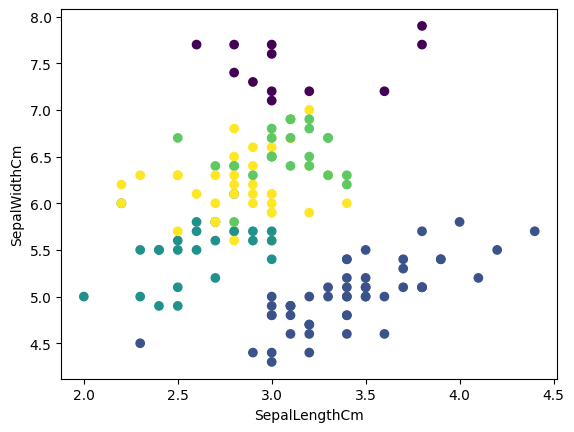

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data['SepalWidthCm'],data['SepalLengthCm'],c=data["cluster"],cmap="viridis")
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

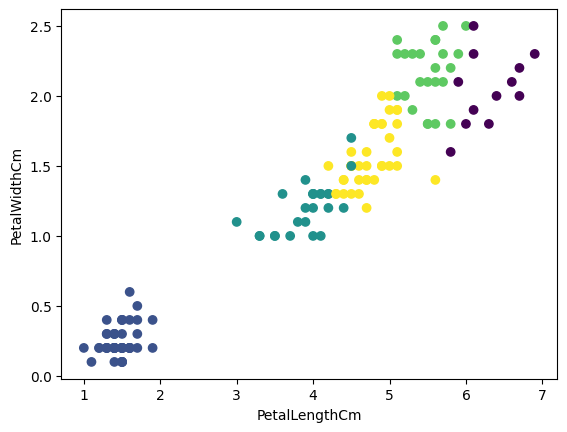

In [22]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],c=data["cluster"],cmap="viridis")
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

In [23]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'cluster'],
      dtype='object')

In [24]:
#print cluster centers
cluster_centres=pd.DataFrame(data=Kmeans.cluster_centers_,columns=data_for_clustering.columns)
print(f"Cluster Centres")
print(cluster_centres)

Cluster Centres
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       7.475000      3.125000       6.300000      2.050000
1       5.006000      3.418000       1.464000      0.244000
2       5.508000      2.600000       3.908000      1.204000
3       6.529167      3.058333       5.508333      2.162500
4       6.207692      2.853846       4.746154      1.564103


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

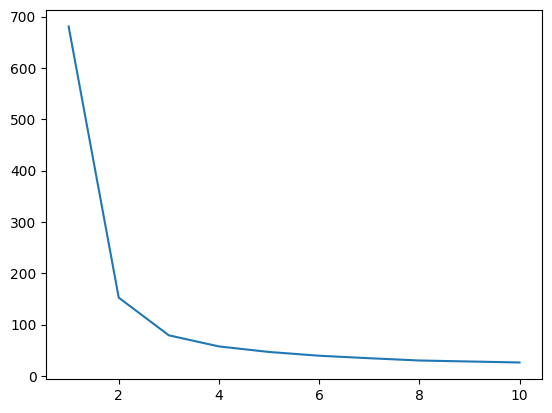

In [25]:
wss_list=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(data_for_clustering)
    wss=sum((np.min(km.transform(data_for_clustering),axis=1))**2)
    wss_list.append(wss)
wss_list
plt.plot(range(1,11),wss_list)    